# Aριθμητική Ανάλυση - 4ο Σετ 
## Κουρτέσης Δημήτρης - ΑΕΜ:15754

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scienceplots # pip install scienceplots
plt.style.use(["science", "notebook", "grid"])
plt.rcParams["text.usetex"] = True

### Άσκηση 1:

Δίνεται η διαφορική εξίσωση,
$$y'=-10\frac{y^2}{x},$$
με αρχικές τιμές $x_{0}=0.1$, $y_{0}=1$ και ζητάται να λυθεί μέχρι το $x=1.1$ με τη μέθοδο Runge - Kutta 2ης τάξης με βήματα $h=0.005$, $h=0.01$, $h=0.015$, $h=0.02$.

Έστω μία διαφορική εξίσωση της μορφής,
$$y'=f(x,y)$$
Η μέθοδος Runge - Kutta 2ης τάξης περιγράφεται από τις σχέσεις,
$$y_{n+1}=y_{n}+\frac{1}{2}\left(k_{1}+k_{2} \right),$$
όπου,
$$k_{1}=hf(x_{n},y_{n}),\space\space k_{2}=hf(x_{n}+h,y_{n}+k_{1})$$

In [2]:
# Ορισμός συνάρτησης που εκτελεί τη μέθοδο Runge -Kutta 2ης τάξης.

def Runge_Kutta_2(f, h, x0, xn, y0):
    x_points = [x0] ; y_points = [y0]
    
    n = int((xn-x0)/h) # Αριθμός υποδιαιρέσεων
    
    for i in range(n):
        x_points.append(x0 + i*h)
        
        k1 = h*f(x_points[i], y_points[i])
        k2 = h*f(x_points[i] + h,y_points[i] + k1)
        
        y_points.append(y_points[i] + (1/2)*(k1 + k2))
    
    return [x_points, y_points]

In [3]:
# Δεδομένα προβλήματος.

x0 = 0.1 ; xn = 1.1 ; y0 = 1

def f(x, y): return -10*(y**2 / x)

h = [0.005*i for i in range(1, 5)]

In [4]:
# Λύσεις για πρώτα 3 h.

solutions = [Runge_Kutta_2(f, h[i], x0, xn, y0) for i in range(len(h) - 1)]

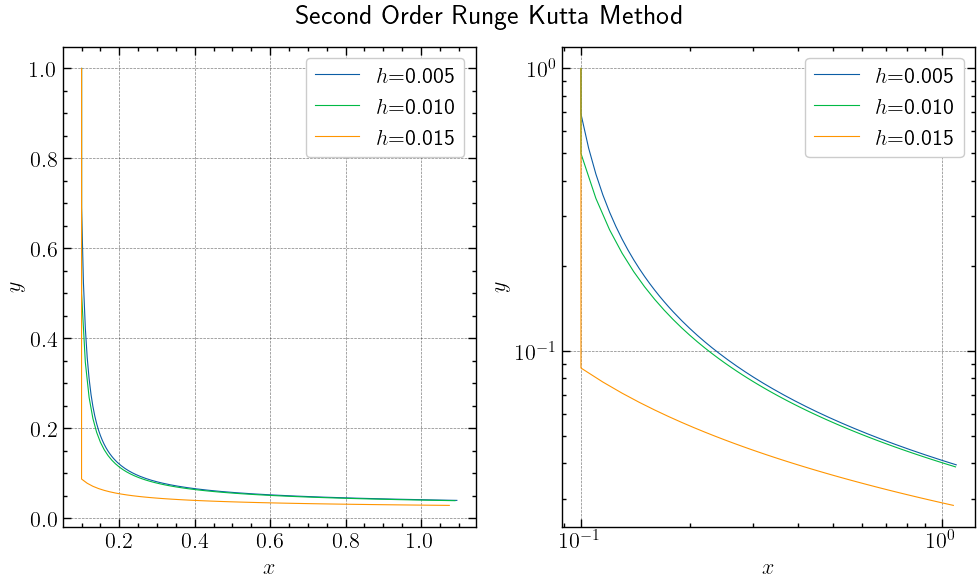

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), tight_layout=True)

ax = axs[0]

for i in range(len(h)-1):
    ax.plot(solutions[i][0], solutions[i][1], label = "$h$=%.3f"%h[i])

ax.set_xlabel(r"$x$") ; ax.set_ylabel(r"$y$")
ax.legend(loc = "upper right") ; plt.rcParams["lines.linewidth"] = 0.8

ax = axs[1]

for i in range(len(h)-1):
    ax.plot(solutions[i][0], solutions[i][1], label = "$h$=%.3f"%h[i])

ax.set_xscale("log") ; ax.set_yscale("log")
ax.set_xlabel(r"$x$") ; ax.set_ylabel(r"$y$")
ax.legend(loc = "upper right") ; plt.rcParams["lines.linewidth"] = 0.8

fig.suptitle(r"Second Order Runge Kutta Method", fontsize=20)
plt.show()

Αρχικά δίνονται γραφικά οι λύσεις για τις πρώτες τρεις τιμές βήματος $h$. Διαφαίνεται ότι ήδη στην τιμή $h=0.015$ εμφανίζεται φανερή απόκλιση από τις προηγούμενες δύο λύσεις, ενώ οι λύσεις $h=0.005$ και $h=0.010$ φαίνεται να συγκλίνουν σε ικανοποιητικό βαθμό. Το δεύτερο διάγραμμα απεικονίζει τις ίδιες λύσεις σε λογαριθμική κλίμακα προκειμένου να γίνει πιο αισθητή η απόκλιση για μεγαλύτερες τιμές του $h$. 

Τέλος, η επίλυση για $h=0.020$ ασταθεί. Συγκεκριμένα, η απόπειρα υπολογιστικής επίλυσης αποτυγχάνει, αφού το $y$ λαμβάνει πολύ μεγάλες τιμές.

In [7]:
Runge_Kutta_2(f, h[len(h)-1], x0, xn, y0)

OverflowError: (34, 'Result too large')

### Άσκηση 2:

Να λυθεί το σύστημα διαφορικών εξισώσεων,
$$\frac{dx}{dt}=p,\space\frac{dp}{dt}=-x$$
με τη μέθοδο Euler - Heun για τις αρχικές συνθήκες $(x_{0},p_{0})=(0,1)$.

$α)$ Για n = 100 επαναλήψεις και $Δt=2\pi /100$

$β)$ Για n = 200 επαναλήψεις και $Δt=2\pi /200$.

Η μέθοδος Euler - Heun δίνεται από τη σχέση,
$$\overline{y_{n+1}}=y_{n}+hf(x_n,y_n)$$

$$y_{n+1}=y_{n}+h\left[f(x_n,y_n)+f(x_{n+1},\overline{y_{n+1}}) \right]$$

Για την επίλυση ενός συστήματος της μορφής,
$$y'=f_{1}(y,z),\space z'=f_{2}(y,z)$$ 
η μέθοδος Euler - Heun θα εφαρμόζεται ως,
$$\overline{y_{n+1}}=y_{n}+hf_{1}(y_n,z_n)$$

$$\overline{z_{n+1}}=z_{n}+hf_{2}(y_n,z_n)$$

$$y_{n+1}=y_{n}+h\left[f_{1}(y_n,z_n) + f_{1}(\overline{y_{n+1}},\overline{z_{n+1}})\right]$$

$$z_{n+1}=z_{n}+h\left[f_{2}(y_n,z_n) + f_{2}(\overline{y_{n+1}},\overline{z_{n+1}})\right]$$

In [8]:
# Ορισμός συνάρτησης που εκτελεί τη μέθοδο Euler - Heun.

def Euler_Heun(f1, f2, h, n, y0, z0):
    y_points = [y0] ; z_points = [z0]
    y_bar = [] ; z_bar = []
    
    for i in range(n):
        y_bar.append(y_points[i] + h*f1(y_points[i], z_points[i]))
        z_bar.append(z_points[i] + h*f2(y_points[i], z_points[i]))
        
        y_points.append(y_points[i] + h*(f1(y_points[i], z_points[i]) + f1(y_bar[i], z_bar[i])))
        z_points.append(z_points[i] + h*(f2(y_points[i], z_points[i]) + f2(y_bar[i], z_bar[i])))
    
    return [y_points, z_points]

In [9]:
# Δεδομένα προβλήματος.

def f1(x, p): return p 
def f2(x, p): return -x
x0 = 0 ; p0 = 1
n = [100, 200] ; h = [2*np.pi / i for i in n]

In [10]:
solutions = [Euler_Heun(f1, f2, h[i], n[i], x0, p0) for i in range(len(h))]
t_points = [[h[0]*i for i in range(n[0]+1)], [h[1]*i for i in range(n[1]+1)]]

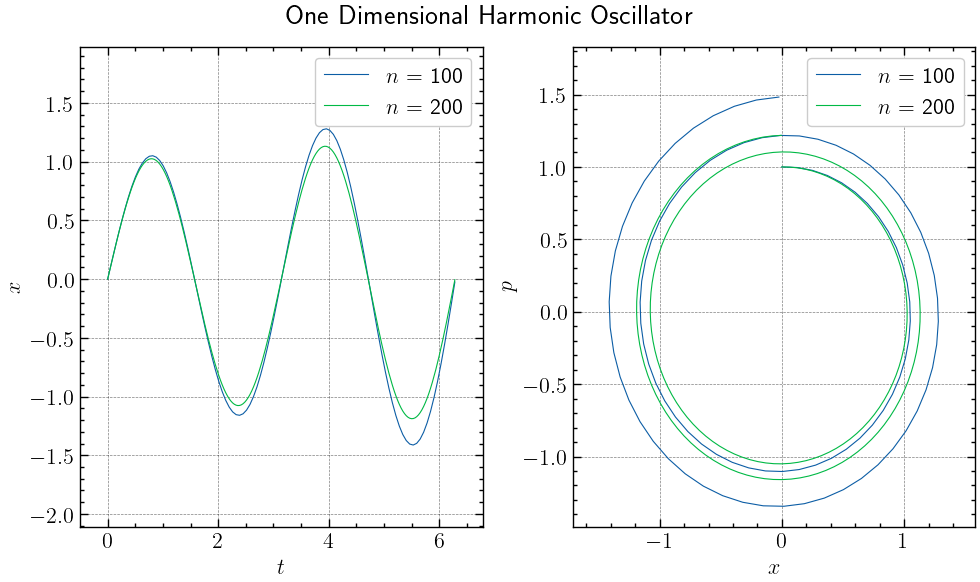

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), tight_layout=True)

ax = axs[0]

for i in range(len(n)):
    ax.plot(t_points[i], solutions[i][0], label=r"$n$ = %i"%(n[i]))

ax.set_xlabel(r"$t$") ; ax.set_ylabel(r"$x$")
ax.legend(loc = "upper right") ; plt.rcParams["lines.linewidth"] = 0.8
ax.set_xlim(t_points[i][0] - 0.5,t_points[i][len(t_points[i])-1] + 0.5)
ax.set_ylim(min(solutions[0][0]) - 0.7, max(solutions[0][0]) + 0.7)

ax = axs[1]

for i in range(len(n)):
    ax.plot(solutions[i][0], solutions[i][1], label=r"$n$ = %i"%(n[i]))

ax.set_xlabel(r"$x$") ; ax.set_ylabel(r"$p$")
ax.legend(loc = "upper right") ; plt.rcParams["lines.linewidth"] = 0.8
ax.set_xlim(min(solutions[0][0]) - 0.3, max(solutions[0][0]) + 0.3)
ax.set_ylim(min(solutions[1][0]) - 0.3, max(solutions[1][0]) + 0.7)

fig.suptitle(r"One Dimensional Harmonic Oscillator", fontsize=20)
plt.show()

Τελικά αποδίδονται τα διαγράμματα $x(t)$ και $p(x)$ των λύσεων που προκύπτουν για αριθμό επαναλήψεων $n = 100$ και $n=200$. H λύση για $n= 200$ αναμένεται να είναι περισσότερο ακριβής.

### Άσκηση 3:

Να λυθεί το πρόβλημα συνοριακών τιμών,
$$y''=-2y'+8y$$
στο διάστημα $0\leq x\leq 1$ με συνθήκες $y(0)=1$ και $y(1)=0$ με τη μέθοδο shooting με Runge - Kutta 2ης τάξης με βήμα $h=1/100$.

Η δοθείσα διαφορική εξίσωση ανάγεται στο σύστημα διαφορικών εξισώσεων,
$$z=y'=f_{1}(y,z)$$

$$z'=-2z+8y=f_{2}(y,z)$$

Η μέθοδος Runge - Kutta 2ης τάξης για τέτοια συστήματα θα δίνεται από τις σχέσεις,
$$y_{n+1}=y_{n}+\frac{1}{2}(k_{1}+k_{2})$$

$$z_{n+1}=z_{n}+\frac{1}{2}(l_{1}+l_{2}),$$

όπου,

$$k_{1}=hf_{1}(y_{n},z_{n}),\space k_{2}=hf_{1}(y_{n}+k_{1},z_{n}+l_{1})$$

$$l_{1}=hf_{2}(y_{n},z_{n}),\space l_{2}=hf_{2}(y_{n}+k_{1},z_{n}+l_{1})$$

In [12]:
def Runge_Kutta_2_system(f1, f2, h, x0, xn, y0, z0):
    x_points = [x0]
    y_points = [y0]
    z_points = [z0]
    
    n = int((xn-x0)/h)
    
    for i in range(1, n):
        x_points.append(x0 + i*h)
    
    for i in range(n-1):
    
        k1 = h * f1(y_points[i], z_points[i])
        l1 = h * f2(y_points[i], z_points[i])
        k2 = h * f1(y_points[i] + k1, z_points[i] + l1)
        l2 = h * f2(y_points[i] + k1, z_points[i] + l1)
    
        y_points.append(y_points[i] + (1/2)*(k1 + k2))
        z_points.append(z_points[i] + (1/2)*(l1 + l2))
    
    return [x_points, y_points, z_points]

In [13]:
# Δεδομένα προβλήματος.

def f1(y, z): return z
def f2(y, z): return -2*z + 8*y
x0 = 0; xn = 1; y0 = 1 ; yn = 0 ; h = 1/100

Η λογική επίλυσης προβλημάτων συνοριακών τιμών με τη μέθοδο shooting περιγράφεται ακολούθως. Αρχικά χρησιμοποιούμε τη μέθοδο Runge - Kutta 2ης τάξης με αρχική τιμή $y(0)=1$ και μία τυχαία τιμή της πρώτης παραγώγου $z(0)\equiv y'(0)$, ώστε να υπολογίσουμε εντέλει τη διαφορά $\Delta y=y(1)-y^{RK(2)}(1)$, όπου $y^{RK(2)}$ η τιμή που βρέθηκε με τη μέθοδο Runge - Kutta 2ης τάξης. Εάν η τιμή αυτή είναι θετική, ακολουθούμε την ίδια διαδικασία για μικρότερη τιμή της πρώτης παραγώγου με σκοπό να βρούμε αρνητική διαφορά. Εάν τώρα ονομάσουμε $z_{+}$ την τιμή που οδήγησε σε θετική διαφορά και $z_{-}$ την τιμή που οδήγησε σε αρνητική διαφορά, τότε εφαρμόζοντας interpolation μπορούμε να βρούμε μία τιμή $z_{new}$ η λύση της οποίας θα προσεγγίζει καλύτερα την τελική λύση $y(1)$. Επαναληπτικά, εάν η $z_{new}$ οδηγεί σε θετική ή αρνητική διαφορά, μετονομάζουμε αναλόγως μία από τις τιμές $z_{+}$ ή $z_{-}$ και εφαρμόζουμε ξανά interpolation βρίσκοντας μία καινούρια $z_{new}$ που οδηγεί σε πλησιέστερη λύση $y^{RK(2)}(1)$. Όταν η ευαισθησία $|y(1)-y^{RK(2)}(1)|$ προσεγγίσει με επαρκή ακρίβεια το $0$ διακόπτουμε την επαναληπτική διαδικασία και θεωρούμε ότι έχουμε βρει την επιθυμητή λύση.

O τύπος του interpolation γράφεται ως,
$$z_{new}(0)=z_{+}(0)+\frac{z_{+}(0)-z_{-}(0)}{y^{RK(2)}_{+}(1)-y^{RK(2)}_{-}(1)}\left(y(1)-y^{RK(2)}_{+}(1) \right)$$

In [14]:
def interpolate(zp, zm, yp, ym, yn):
    return zp + ((zp - zm) / (yp - ym)) * (yn - yp)

def shooting(f1, f2, h, x0, xn, y0, yn):
    zp = 0 ; zm = 0 ; yp = 0
    z1 = 2 # Random initial derivative.
    
    solution = Runge_Kutta_2_system(f1, f2, h, x0, xn, y0, z1)
    y1 = solution[1][len(solution[1])-1]
    
    if (yn - y1) > 0:
        zp = z1
        yp = y1
        
        for i in range(100):
            z1 *= 20
            solution = Runge_Kutta_2_system(f1, f2, h, x0, xn, y0, z1)
            y1 = solution[1][len(solution[1])-1]
            if (yn - y1) < 0:
                zm = z1
                ym = y1
                break
            else:
                print("Couldnt find negative values for Delta yn.")
                return 0
        
    elif (yn - y1) < 0:
        zm = z1
        ym = y1
        
        for i in range(200):
            z1 *= -20
            solution = Runge_Kutta_2_system(f1, f2, h, x0, xn, y0, z1)
            y1 = solution[1][len(solution[1])-1]
            if (yn - y1) > 0:
                zp = z1
                yp = y1
                break
            else:
                print("Couldnt find positive values for Delta yn.")
                return 0
        
    else: 
        return solution
      
    znew = interpolate(zp, zm, yp, ym, yn)
    
    while np.abs(yn - y1) > 1e-6:
        solution = Runge_Kutta_2_system(f1, f2, h, x0, xn, y0, znew)
        y1 = solution[1][len(solution[1]) - 1]
        
        if (yn - y1) > 0:
            zp = znew 
            yp = y1
        else:
            zm = znew
            ym = y1
        
        znew = interpolate(zp, zm, yp, ym, yn)
    
    return solution

In [15]:
# Τελική λύση με τη μέθοδο shooting.
solution_shooting = shooting(f1, f2, h, x0, xn, y0, yn)

### Άσκηση 4:

Τέλος, ζητείται να λυθεί το ίδιο σύστημα με τη μέθοδο των πεπερασμένων διαφορών. Θεωρώντας μία διαφορική εξίσωση της μορφής,
$$\alpha (x)\frac{d^{2}u}{dx^{2}}+\beta (x)\frac{du}{dx}+\gamma (x)u+\delta(x)=0,$$
με γνωστά τα $u_{1}$, $u_{N}$, ορίζουμε τα σημεία 
$$x_{i}=x_{0}+(i-1)\cdot h,$$
ενώ ακολούθως διακριτοποιούμε τις παραγώγους μέχρι όρους $\mathcal{O}(h^{2})$ λαμβάνοντας την εξίσωση πεπερασμένων διαφορών,
$$\alpha_{i}\frac{u_{i+1}-2u_{i}+u_{i-1}}{h^{2}}+\beta_{i}\frac{u_{i+1}-u_{i-1}}{2h}+\gamma_{i}u_{i}+\delta_{i}=0$$

Η εξίσωση αυτή μπορεί να γραφτεί σε μορφή τριδιαγώνιου συστήματος,
$$\overleftrightarrow{A}\cdot\vec{u}=\vec{D},$$

με τον τριδιαγώνιο πίνακα $\overleftrightarrow{A}$ να περιγράφεται σε τρία διανύσματα  $\vec{a},\vec{b},\vec{c}$, όπου,
$$b_{j}=\gamma_{j}-\frac{2\alpha_{j}}{h^{2}},\space j=1,...,n$$

$$a_{j}=\frac{\alpha_{j}}{h^{2}}-\frac{\beta_{j}}{2h},\space j=2,...,n$$

$$c_{j}=\frac{\alpha_{j}}{h^{2}}+\frac{\beta_{j}}{2h},\space j=1,...,n-1$$

και τα στοιχεία του διανύσματος $\vec{d}$ να αποδίδονται ως,

$$d_{1}=-\delta_{1}-\left(\frac{\alpha_{1}}{h^2}-\frac{\beta_{1}}{2h} \right)u_{1}$$

$$d_{j}=-\delta_{j},\space j=2,...,n-1$$

$$d_{n}=-\delta_{n}-\left(\frac{\alpha_{n+1}}{h^2}+\frac{b_{n+1}}{2h} \right)u_{N}$$

Σημειώνεται ότι οι διάφοροι δείκτες συσχετίζονται μέσω των σχέσεων, $j\rightarrow i-1$, $n\rightarrow N-2$, ενώ ο δείκτης $i$ παίρνει τις τιμές $i=2,...,N-1$.

To σύστημα αυτό λύνεται με τη μέθοδο $LU$ ως,
$$\overleftrightarrow{L}\cdot\vec{G}=\vec{D},$$

$$\overleftrightarrow{U}\cdot\vec{u}=\vec{G},$$

τα στοιχεία των οποίων δίνονται από τις σχέσεις,

$$b_{1}'=b_{1}$$

$$a'_{j}=\frac{a_{j}}{b'_{j-1}},\space j=2,...,n$$

$$b'_{j}=b_{j}-a'_{j}c_{j-1},\space j=2,...,n$$

$$c'_{j}=c_{j},\space j=1,...,n$$

Τελικά, τα στοιχεία του διανύσματος $\vec{G}$ δίνονται ως,

$$g_{1}=d_{1}$$

$$g_{j}=d_{j}-a'_{j}g_{j-1},\space j=2,...,n$$

και, εντέλει, τα στοιχεία του διανύσματος $\vec{u}$ δίνονται ως,

$$u_{n}=\frac{g_{n}}{b'_{n}}$$

$$u_{j}=\frac{g_{j}-c_{j}u_{j+1}}{b'_{j}}$$

In [16]:
def tridiagonal(a, b, c, d):
    n = len(a)
    a_new = [0] # Δεν υπάρχει στοιχείο α1', οπότε το θέτουμε ίσο με 0.
    b_new = [b[0]]
    c_new = c
    g = [d[0]]
    u = []
    
    for i in range(1, n): # a', b' 
        a_new.append(a[i]/b_new[i-1])
        b_new.append(b[i]-a_new[i]*c[i-1])
    
    for i in range(1, n): # g
        g.append(d[i]-a_new[i]*g[i-1])
    
    for i in range(n):
        u.append(0)
    
    u[n-1] = g[n-1] / b_new[n-1] 
    
    for i in range(n-2, -1, -1):
        u[i] = (g[i] - c[i]*u[i+1]) / b_new[i]
    
    return u

In [17]:
def finite_difference(alpha, beta, gamma, delta, h, x1, xN, u1, uN):
    N = int((xN-x1) / h)
    n = N - 2
    x_points = [x1 + i*h for i in range(N)] ; u_points = [u1]
    a = [0] ; b = [] ; c = [] # Δεν υπάρχει στοιχείο α1, οπότε το θέτουμε ίσο με 0.
    
    for i in range(n):
        x = x_points[i]
        b.append(gamma(x) - 2*alpha(x)/(h**2))
    
    for i in range(1, n):
        x = x_points[i]
        a.append(alpha(x)/(h**2) - beta(x)/(2*h))
    
    for i in range(n-1):
        x = x_points[i]
        c.append(alpha(x)/(h**2) + beta(x)/(2*h))
    c.append(0) # Δεν υπάρχει στοιχείο cn, απλά το προσθ΄έτουμε για να είναι όλα τα διανύσματα ίδιων διαστάσεων.
    
    d = [-delta(x_points[1]) -(alpha(x_points[1])/(h**2) - beta(x_points[1])/(2*h))*u1]
    for i in range(1, n-1):
        x = x_points[i]
        d.append(-delta(x))
    d.append(-delta(x_points[n]) - (alpha(x_points[n])/(h**2) + beta(x_points[n])/(2*h))*uN)
    
    u_temp = tridiagonal(a, b, c, d)
    
    for i in range(len(u_temp)):
        u_points.append(u_temp[i])
    u_points.append(uN)
    
    return [x_points, u_points]

Για το πρόβλημα της εκφώνησης, η διαφορική εξίσωση μπορεί να γραφτεί στη μορφή,
$$y''+2y'-8y=0,$$

από όπου προκύπτουν οι συναρτήσεις

$$\alpha(x)=1,\space \beta(x)=2,\space \gamma(x)=-8,\space \delta(x)=0$$

In [18]:
# Δεδομένα προβλήματος.

def alpha(x): return 1
def beta(x): return 2
def gamma(x): return -8
def delta(x): return 0

h = 1/100 ; x1 = 0 ; xN = 1 ; u1 = 1 ; uN = 0

In [19]:
# Τελική λύση με τη μέθοδο πεπερασμένων διαφορών.
solution_finite_difference = finite_difference(alpha, beta, gamma, delta, h, x1, xN, u1, uN)

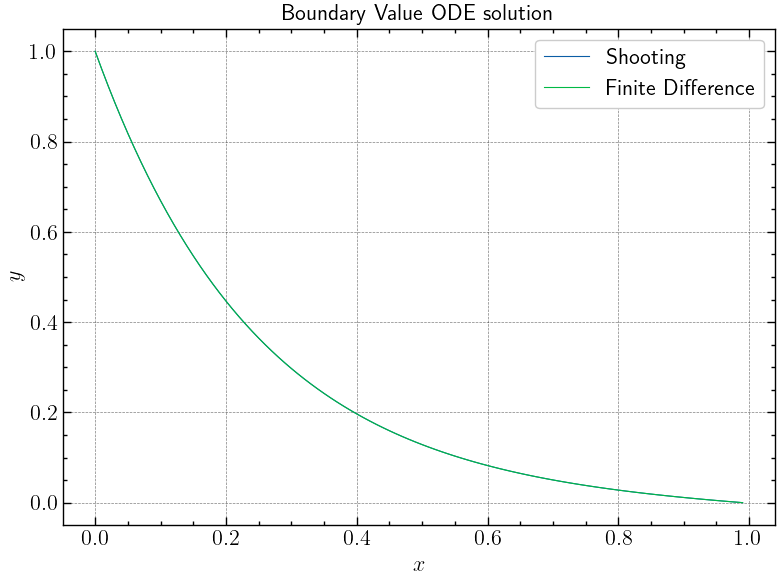

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), tight_layout=True)

ax.plot(solution_shooting[0], solution_shooting[1], label="Shooting")
ax.plot(solution_finite_difference[0], solution_finite_difference[1], label = "Finite Difference")

ax.set_xlabel(r"$x$") ; ax.set_ylabel(r"$y$") ; ax.set_title(r"Boundary Value ODE solution")
ax.legend(loc = "upper right") ; plt.rcParams["lines.linewidth"] = 0.8

plt.show()

Εντέλει, χαράσσονται τα διαγράμματα $y(x)$ των τιμών που αποδίδει μέθοδος Shooting και η μέθοδος των πεπερασμένων διαφορών. Φανερά, οι δύο μέθοδοι αποδίδουν λύσεις σχεδόν ίδιας ακρίβειας, με τη διαφορά στις δύο καμπύλες να μην είναι διακρίσιμη.